In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/the-movies-dataset/links.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/keywords.csv


In [3]:
meta = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')
meta_copy = meta

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
meta.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [5]:
meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
meta[meta['original_title'] != meta['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


In [8]:
meta = meta.drop('original_title', axis=1)

In [9]:
(len(meta[meta['revenue'] == 0].index)/len(meta.index))*100 # Percentage of movies where the revenue is 0

83.69330928605991

In [10]:
len(meta[meta['revenue'] != 0].index)

7414

For 7414 movies there is revenue information available. So now what we can do is get a revenue budget ratio, and if revenue is zero the ratio becomes zero.

In [11]:
meta['budget']

0        30000000
1        65000000
2               0
3        16000000
4               0
           ...   
45461           0
45462           0
45463           0
45464           0
45465           0
Name: budget, Length: 45466, dtype: object

In [12]:
meta['budget'] = pd.to_numeric(meta['budget'], errors='coerce')

In [13]:
meta['budget'] = meta['budget'].replace(0, np.nan)
meta['revenue'] = meta['revenue'].replace(0, np.nan)

In [14]:
meta['returns'] = meta['revenue']/meta['budget']

In [15]:
meta.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,returns
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.0155,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035


In [16]:
len(meta[meta['adult'] == 'True'].index)

9

Since there are only 9 movies that are adult, dropping the information.

In [17]:
meta = meta.set_index("adult")
meta.drop('True', axis = 0)
meta.head(2)

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,overview,popularity,poster_path,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,returns
adult,,,,,,,,,,,,,,,,,,,,,
False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801
False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035


In [18]:
meta.reset_index(inplace=True)

In [19]:
meta.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,returns
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.0155,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035


In [20]:
meta = meta.drop(['adult', 'belongs_to_collection', 'homepage', 'video','imdb_id','poster_path'], axis=1)

In [21]:
meta.head(2)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,returns
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,12.451801
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,4.043035


In [22]:
import ast
def json_str_to_csv(string, key='name'):
    try:
        d = ast.literal_eval(string)
        return ",".join([each[key] for each in d])
    except Exception as e:
        return ''

In [23]:
json_str_to_csv(meta['genres'][0])

'Animation,Comedy,Family'

In [24]:
meta['genres'] = meta['genres'].apply(json_str_to_csv)
meta['production_companies'] = meta['production_companies'].apply(json_str_to_csv)
meta['spoken_languages'] = meta['spoken_languages'].apply(json_str_to_csv)
meta['production_countries'] = meta['production_countries'].apply(json_str_to_csv)

In [25]:
meta.head()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,returns
0,30000000.0,"Animation,Comedy,Family",862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Released,NaN,Toy Story,7.7,5415.0,12.451801
1,65000000.0,"Adventure,Fantasy,Family",8844,en,When siblings Judy and Peter discover an encha...,17.0155,"TriStar Pictures,Teitler Film,Interscope Commu...",United States of America,1995-12-15,262797249.0,104.0,"English,Français",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,4.043035
2,NaN,"Romance,Comedy",15602,en,A family wedding reignites the ancient feud be...,11.7129,"Warner Bros.,Lancaster Gate",United States of America,1995-12-22,NaN,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,NaN
3,16000000.0,"Comedy,Drama,Romance",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81452156.0,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,5.090760
4,NaN,Comedy,11862,en,Just when George Banks has recovered from his ...,8.38752,"Sandollar Productions,Touchstone Pictures",United States of America,1995-02-10,76578911.0,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,NaN


In [26]:
def str_to_list(string):
    return string.split(',')

In [27]:
meta['genres'] = meta['genres'].apply(str_to_list)
meta['production_companies'] = meta['production_companies'].apply(str_to_list)
meta['spoken_languages'] = meta['spoken_languages'].apply(str_to_list)
meta['production_countries'] = meta['production_countries'].apply(str_to_list)

In [28]:
meta.head()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,returns
0,30000000.0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,7.7,5415.0,12.451801
1,65000000.0,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.0155,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,4.043035
2,NaN,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,NaN,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,NaN
3,16000000.0,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,5.090760
4,NaN,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.38752,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,NaN


# One Hot Encoding for Categorical Values

In [29]:
from sklearn.preprocessing import MultiLabelBinarizer

In [30]:
mlb = MultiLabelBinarizer()

In [31]:
ohe_genres = pd.DataFrame(mlb.fit_transform(meta['genres']),columns=mlb.classes_, index=meta.index)

In [32]:
ohe_genres

,,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,...,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45463,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45464,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
list(ohe_genres)

['',
 'Action',
 'Adventure',
 'Animation',
 'Aniplex',
 'BROSTA TV',
 'Carousel Productions',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'GoHands',
 'History',
 'Horror',
 'Mardock Scramble Production Committee',
 'Music',
 'Mystery',
 'Odyssey Media',
 'Pulser Productions',
 'Rogue State',
 'Romance',
 'Science Fiction',
 'Sentai Filmworks',
 'TV Movie',
 'Telescene Film Group Productions',
 'The Cartel',
 'Thriller',
 'Vision View Entertainment',
 'War',
 'Western']

In [34]:
ohe_production_companies = pd.DataFrame(mlb.fit_transform(meta['production_companies']),columns=mlb.classes_, index=meta.index)

In [35]:
ohe_production_companies

,,4 Women Productions,A,A.I.E.,American Federation of Labor,Arrow S.L.,Atlantic & Gulf Coast District,Audiovisual e Multimédia (ICAM),Australian Film Commission,Baby!,...,롯데엔터테인먼트,쇼박스(주)미디어플렉스,싸이더스 픽쳐스,씨너스엔터테인먼트(주),영화사 수박,영화사 집,이디오플랜,인벤트 디,타임스토리그룹,프로덕션M
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
list(ohe_production_companies)

['',
 ' 4 Women Productions',
 ' A',
 ' A.I.E.',
 ' American Federation of Labor',
 ' Arrow S.L.',
 ' Atlantic & Gulf Coast District',
 ' Audiovisual e Multimédia (ICAM)',
 ' Australian Film Commission',
 ' Baby!',
 ' Black & White',
 ' Brain! Productions',
 ' Brezner',
 ' Central Television USSR',
 ' Cooperativa Cinematográfica',
 ' Culture and Sports',
 ' DPI',
 ' Donald Osborne',
 ' Département Fédéral des Affaires Etrangères',
 ' El',
 ' Flaminia Produzioni Cinematografiche',
 ' Fundo Setorial do Audiovisual',
 ' Göteborg',
 ' Heldring & Pierson N.V.',
 ' Hong Kong',
 ' Inc',
 ' Inc.',
 ' Information and Education Division',
 ' L.L.C.',
 ' LLC',
 ' La',
 ' Le',
 ' LeMasters Productions',
 ' Lodges and Inns',
 ' Ltd',
 ' Ltd.',
 ' M. Flor',
 ' M.D.A. Films S.L.',
 ' Making Of',
 ' Media & Entertainment',
 ' Mill & Smelter Workers',
 ' Moscow',
 ' North',
 ' Not Stirred Productions',
 ' P.C.',
 ' Planet Productions',
 ' Provobis Film',
 ' Pupkin Film',
 ' Rastar Pictures',
 ' Richwit

In [37]:
ohe_spoken_languages = pd.DataFrame(mlb.fit_transform(meta['spoken_languages']),columns=mlb.classes_, index=meta.index)

In [38]:
ohe_spoken_languages=ohe_spoken_languages.drop(['','?????','??????'], axis=1)

In [39]:
ohe_spoken_languages

,Afrikaans,Azərbaycan,Bahasa indonesia,Bahasa melayu,Bamanankan,Bokmål,Bosanski,Català,Cymraeg,Dansk,...,বাংলা,ਪੰਜਾਬੀ,தமிழ்,తెలుగు,ภาษาไทย,ქართული,广州话 / 廣州話,日本語,普通话,한국어/조선말
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
list(ohe_spoken_languages)

['Afrikaans',
 'Azərbaycan',
 'Bahasa indonesia',
 'Bahasa melayu',
 'Bamanankan',
 'Bokmål',
 'Bosanski',
 'Català',
 'Cymraeg',
 'Dansk',
 'Deutsch',
 'Eesti',
 'English',
 'Español',
 'Esperanto',
 'Français',
 'Fulfulde',
 'Gaeilge',
 'Galego',
 'Hausa',
 'Hrvatski',
 'Italiano',
 'Kinyarwanda',
 'Kiswahili',
 'Latin',
 'Latviešu',
 'Lietuvi\x9akai',
 'Magyar',
 'Malti',
 'Nederlands',
 'No Language',
 'Norsk',
 'Polski',
 'Português',
 'Pусский',
 'Română',
 'Slovenčina',
 'Slovenščina',
 'Somali',
 'Srpski',
 'Tiếng Việt',
 'Türkçe',
 'Wolof',
 'euskera',
 'isiZulu',
 'ozbek',
 'shqip',
 'suomi',
 'svenska',
 'Íslenska',
 'Český',
 'ελληνικά',
 'Український',
 'беларуская мова',
 'български език',
 'қазақ',
 'עִבְרִית',
 'اردو',
 'العربية',
 'فارسی',
 'پښتو',
 'हिन्दी',
 'বাংলা',
 'ਪੰਜਾਬੀ',
 'தமிழ்',
 'తెలుగు',
 'ภาษาไทย',
 'ქართული',
 '广州话 / 廣州話',
 '日本語',
 '普通话',
 '한국어/조선말']

In [41]:
ohe_production_countries = pd.DataFrame(mlb.fit_transform(meta['production_countries']),columns=mlb.classes_, index=meta.index)

In [42]:
ohe_production_countries.head()

,,Afghanistan,Albania,Algeria,Angola,Antarctica,Argentina,Armenia,Aruba,Australia,...,United Arab Emirates,United Kingdom,United States Minor Outlying Islands,United States of America,Uruguay,Uzbekistan,Venezuela,Vietnam,Yugoslavia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
list(ohe_production_countries)

['',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 "Cote D'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Czechoslovakia',
 'Denmark',
 'Dominican Republic',
 'East Germany',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'French Polynesia',
 'French Southern Territories',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Guatemala',
 'Guinea',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kaz

In [44]:
# meta1=pd.concat([meta, ohe_genres, ohe_spoken_languages, ohe_production_companies, ohe_production_countries], axis=1, sort=False)
# meta1 = meta1.drop(['genres', 'spoken_languages', 'production_companies', 'production_countries'], axis=1)

# Visualizations

In [45]:
#Convert OHE df to dictionary 
def convert_ohe_dict(data):
    col = list(data)
    col.pop(0)
    gr_data = {}
    for each in col:
        gr_data[each] = len(data[data[each]==1])
    gr_data={k: v for k, v in sorted(gr_data.items(), key=lambda item: item[1], reverse=True)}
    return gr_data

In [46]:
#Plot Bar Graph from dict
def plot_bar_graph_from_dict(data):
    keys = data.keys()
    values = data.values()
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(keys, values)
    plt.xticks(rotation=90)
    plt.show()

In [47]:
#Deletes low value keys
def delete_values_from_dict(data_dict, value):
    new_dict={}
    for k,v in data_dict.items():
        if v <= value:
            continue
        new_dict[k]=v
    return new_dict

### Genre

In [48]:
genre_count_list=convert_ohe_dict(ohe_genres)

In [49]:
genre_count_list

{'Drama': 20265,
 'Comedy': 13182,
 'Thriller': 7624,
 'Romance': 6735,
 'Action': 6596,
 'Horror': 4673,
 'Crime': 4307,
 'Documentary': 3932,
 'Adventure': 3496,
 'Science Fiction': 3049,
 'Family': 2770,
 'Mystery': 2467,
 'Fantasy': 2313,
 'Animation': 1935,
 'Foreign': 1622,
 'Music': 1598,
 'History': 1398,
 'War': 1323,
 'Western': 1042,
 'TV Movie': 767,
 'Aniplex': 1,
 'BROSTA TV': 1,
 'Carousel Productions': 1,
 'GoHands': 1,
 'Mardock Scramble Production Committee': 1,
 'Odyssey Media': 1,
 'Pulser Productions': 1,
 'Rogue State': 1,
 'Sentai Filmworks': 1,
 'Telescene Film Group Productions': 1,
 'The Cartel': 1,
 'Vision View Entertainment': 1}

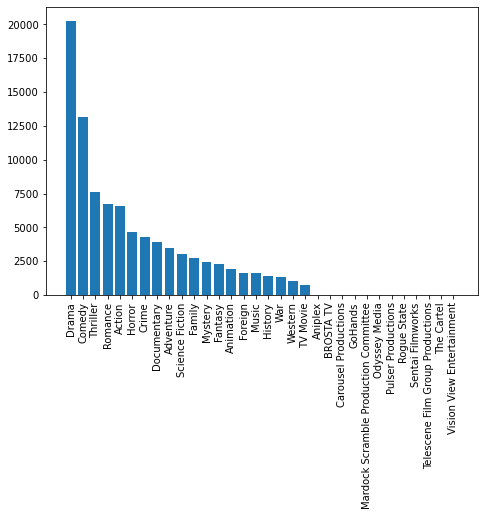

In [50]:
plot_bar_graph_from_dict(genre_count_list)

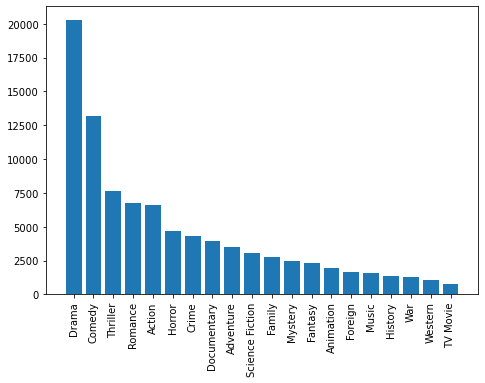

In [51]:
# Removing Values less than/equal to 1
genre_dict=delete_values_from_dict(genre_count_list, 1)
plot_bar_graph_from_dict(genre_dict)

### Production Companies

In [52]:
pc_dict=convert_ohe_dict(ohe_production_companies)

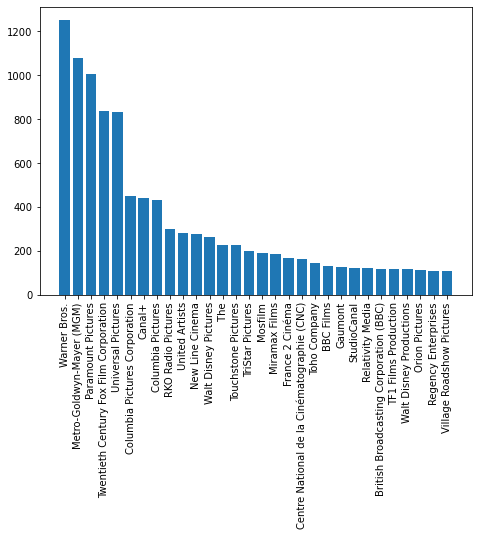

In [53]:
#Removing Values less than/equal to 100 
pc_dict_small=delete_values_from_dict(pc_dict, 100)
plot_bar_graph_from_dict(pc_dict_small)

### Production Countries

In [54]:
prod_countries_dict=convert_ohe_dict(ohe_production_countries)

In [55]:
#Only show countries with more than 200 movies
prod_countries_small=delete_values_from_dict(prod_countries_dict, 200)

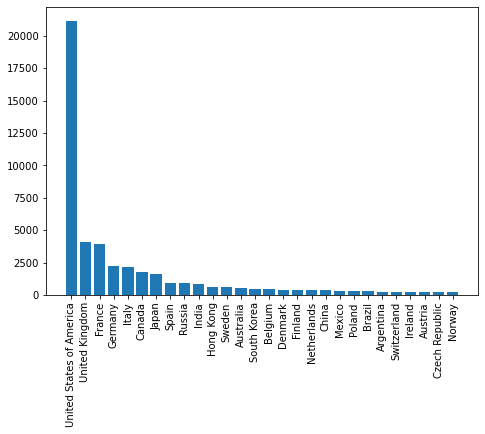

In [56]:
plot_bar_graph_from_dict(prod_countries_small)

### Production Companies vs Genre

In [57]:
for each in meta['production_companies'].head(10):
    print(each)

['Pixar Animation Studios']
['TriStar Pictures', 'Teitler Film', 'Interscope Communications']
['Warner Bros.', 'Lancaster Gate']
['Twentieth Century Fox Film Corporation']
['Sandollar Productions', 'Touchstone Pictures']
['Regency Enterprises', 'Forward Pass', 'Warner Bros.']
['Paramount Pictures', 'Scott Rudin Productions', 'Mirage Enterprises', 'Sandollar Productions', 'Constellation Entertainment', 'Worldwide', 'Mont Blanc Entertainment GmbH']
['Walt Disney Pictures']
['Universal Pictures', 'Imperial Entertainment', 'Signature Entertainment']
['United Artists', 'Eon Productions']


In [58]:
production_companies_genre_map = {}
genre_small_dict = genre_dict
for ind in meta.index:
    for each in meta['production_companies'][ind]:
        if each not in production_companies_genre_map:
            production_companies_genre_map[each] = {}
        for gen in meta['genres'][ind]:
            if gen not in production_companies_genre_map[each]:
                production_companies_genre_map[each][gen] = 1
            else:
                production_companies_genre_map[each][gen] += 1

for each in production_companies_genre_map:
    production_companies_genre_map[each]={k: v for k, v in sorted(production_companies_genre_map[each].items(), key=lambda item: item[1], reverse=True)}

temp_dict={}
for mov in pc_dict_small:
    if mov in production_companies_genre_map.keys():
        temp_dict[mov] = production_companies_genre_map[mov]
production_companies_genre_map = temp_dict


In [59]:
for each_dict in production_companies_genre_map.values():
    temp_dict={}
    for gen in each_dict:
        if gen in genre_dict:
            temp_dict[gen]= genre_dict[gen]
    each_dict=temp_dict    

### Production Company vs No. of movies per Genre

In [60]:
production_companies_genre_map

{'Warner Bros.': {'Drama': 656,
  'Comedy': 401,
  'Action': 278,
  'Romance': 262,
  'Crime': 253,
  'Thriller': 252,
  'Adventure': 191,
  'Mystery': 106,
  'Fantasy': 103,
  'Family': 88,
  'Science Fiction': 80,
  'Western': 76,
  'Music': 76,
  'War': 64,
  'Horror': 56,
  'History': 50,
  'Animation': 47,
  'Documentary': 10,
  '': 2,
  'Foreign': 2},
 'Metro-Goldwyn-Mayer (MGM)': {'Drama': 593,
  'Comedy': 380,
  'Romance': 358,
  'Action': 154,
  'Thriller': 153,
  'Crime': 137,
  'Adventure': 121,
  'Music': 119,
  'Mystery': 77,
  'Western': 62,
  'Family': 58,
  'Horror': 57,
  'War': 55,
  'Science Fiction': 44,
  'Fantasy': 44,
  'History': 31,
  'Animation': 15,
  'Documentary': 6,
  '': 5,
  'Foreign': 2,
  'TV Movie': 1},
 'Paramount Pictures': {'Drama': 457,
  'Comedy': 408,
  'Romance': 257,
  'Thriller': 213,
  'Action': 198,
  'Adventure': 152,
  'Crime': 131,
  'Science Fiction': 93,
  'Mystery': 91,
  'Family': 67,
  'Horror': 65,
  'Music': 63,
  'Western': 56,
 

In [61]:
pc_list = []
for pc in pc_dict_small.keys():
   pc_list.append(pc) 
pc_list

['Warner Bros.',
 'Metro-Goldwyn-Mayer (MGM)',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Universal Pictures',
 'Columbia Pictures Corporation',
 'Canal+',
 'Columbia Pictures',
 'RKO Radio Pictures',
 'United Artists',
 'New Line Cinema',
 'Walt Disney Pictures',
 ' The',
 'Touchstone Pictures',
 'TriStar Pictures',
 'Mosfilm',
 'Miramax Films',
 'France 2 Cinéma',
 'Centre National de la Cinématographie (CNC)',
 'Toho Company',
 'BBC Films',
 'Gaumont',
 'StudioCanal',
 'Relativity Media',
 'British Broadcasting Corporation (BBC)',
 'TF1 Films Production',
 'Walt Disney Productions',
 'Orion Pictures',
 'Regency Enterprises',
 'Village Roadshow Pictures']

In [62]:
genre_list = []
for gen in genre_dict.keys():
    genre_list.append(gen)
genre_list

['Drama',
 'Comedy',
 'Thriller',
 'Romance',
 'Action',
 'Horror',
 'Crime',
 'Documentary',
 'Adventure',
 'Science Fiction',
 'Family',
 'Mystery',
 'Fantasy',
 'Animation',
 'Foreign',
 'Music',
 'History',
 'War',
 'Western',
 'TV Movie']

In [63]:
import random
def random_color():
    c = 'b g r c m y k'.split(' ')
    return random.choice(c)

### Production Company vs Genre - Visualization

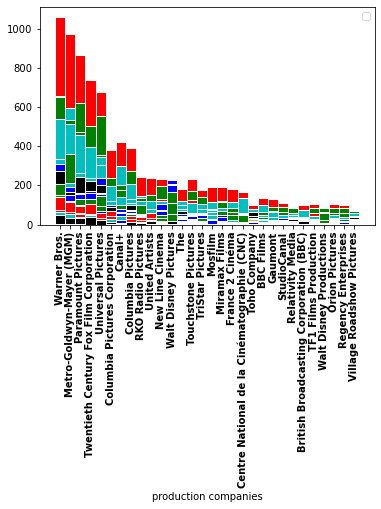

In [64]:
r = list(range(0,len(pc_list)))
first_flag = True
bottom_list=[]
for genre in genre_list:
    temp_list = []
    for each in production_companies_genre_map:
        found_flag = False
        for gen in production_companies_genre_map[each]:
            if gen == genre:
                temp_list.append(production_companies_genre_map[each][gen])
                found_flag = True
        if found_flag == False:
            temp_list.append(0)
    if first_flag == True:
        first_flag = False
        plt.bar(r, temp_list, color=random_color(), edgecolor='white', width=1)
        bottom_list = temp_list
    else:
        plt.bar(r, temp_list, bottom=bottom_list, color=random_color(), edgecolor='white', width=1)
        bottom_list=temp_list
plt.xticks(r, pc_list, fontweight='bold', rotation=90, fontsize=10)
plt.xlabel("production companies")
plt.legend()
# plt.rcParams["figure.figsize"] = (900,400)
plt.show()




    

### Highest Earning Production Companies

In [65]:
meta.head(2)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,returns
0,30000000.0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,7.7,5415.0,12.451801
1,65000000.0,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.0155,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,4.043035


In [66]:
s = meta.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [67]:
print(s[1])

1             TriStar Pictures
1                 Teitler Film
1    Interscope Communications
Name: companies, dtype: object


In [68]:
com_df = meta.drop('production_companies', axis=1).join(s)

In [69]:
print(com_df)

           budget                        genres      id original_language  \
0      30000000.0   [Animation, Comedy, Family]     862                en   
1      65000000.0  [Adventure, Fantasy, Family]    8844                en   
1      65000000.0  [Adventure, Fantasy, Family]    8844                en   
1      65000000.0  [Adventure, Fantasy, Family]    8844                en   
2             NaN             [Romance, Comedy]   15602                en   
...           ...                           ...     ...               ...   
45461         NaN               [Drama, Family]  439050                fa   
45462         NaN                       [Drama]  111109                tl   
45463         NaN     [Action, Drama, Thriller]   67758                en   
45464         NaN                            []  227506                en   
45465         NaN                            []  461257                en   

                                                overview popularity  \
0   

In [70]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

Highest earning production companies based on revenue. Calculated by finding the sum and mean of the 'revenue' and also the total number of movies.

In [71]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78
Dune Entertainment,1.500379e+10,2.419966e+08,62


Production companies that produce the most successful movies on average. This is calculated by filtering production companies with atleast 15 movies and desc sorting on average revenue.

In [72]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19
Legendary Pictures,1.346866e+10,3.367166e+08,40


### Correlation between Features

In [73]:
meta.dtypes

budget                  float64
genres                   object
id                       object
original_language        object
overview                 object
popularity               object
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count              float64
returns                 float64
dtype: object

In [74]:
cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'returns']

In [75]:
meta_num = meta[cols]

In [76]:
meta_num.head(2)

,budget,revenue,runtime,vote_average,vote_count,returns
0,30000000.0,373554033.0,81.0,7.7,5415.0,12.451801
1,65000000.0,262797249.0,104.0,6.9,2413.0,4.043035


In [77]:
meta_num.apply(lambda x: x/x.max(), axis=0)

,budget,revenue,runtime,vote_average,vote_count,returns
0,0.078947,0.133988,0.064490,0.77,0.384725,1.004471e-06
1,0.171053,0.094261,0.082803,0.69,0.171439,3.261463e-07
2,NaN,NaN,0.080414,0.65,0.006536,NaN
3,0.042105,0.029216,0.101115,0.61,0.002416,4.106649e-07
4,NaN,0.027468,0.084395,0.57,0.012291,NaN
...,...,...,...,...,...,...
45461,NaN,NaN,0.071656,0.40,0.000071,NaN
45462,NaN,NaN,0.286624,0.90,0.000213,NaN
45463,NaN,NaN,0.071656,0.38,0.000426,NaN
45464,NaN,NaN,0.069268,0.00,0.000000,NaN


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


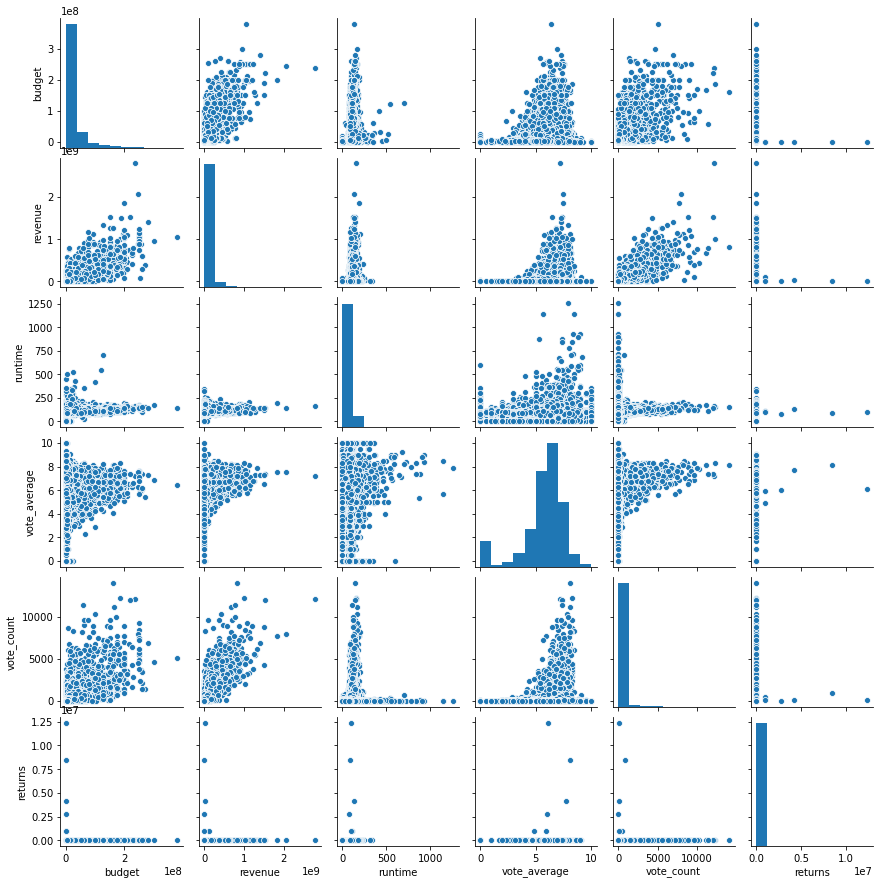

In [78]:
import seaborn as sns
sns.pairplot(meta_num, size=2.0)

### Demographic Filtering 

Calculating based on IMDB weighted rating (WR) formula = ((v/v+m)* R) + ((m/v+m)* C)
* v - no. of votes for the movie (vote_count)
* m - minimum votes required to be listed
* R - Average rating of the movie (vote_average)
* C - Mean vote across whole report

In [79]:
C= meta['vote_average'].mean()
C

5.618207215133889

Setting m as the 90% percentile

In [80]:
m = meta['vote_count'].quantile(0.9)
m

160.0

In [81]:
q_movies = meta.copy().loc[meta['vote_count'] >= m]
q_movies.shape

(4555, 18)

In [82]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [83]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [84]:
q_movies.head(2)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,returns,score
0,30000000.0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,7.7,5415.0,12.451801,7.640253
1,65000000.0,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.0155,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,4.043035,6.820293


In [85]:
#Sort based on score
q_movies = q_movies.sort_values('score', ascending=False)

In [86]:
#Display top 10 movies
q_movies[['title', 'vote_count', 'vote_average', 'score', 'returns', 'production_companies']].head(10)

,title,vote_count,vote_average,score,returns,production_companies
314,The Shawshank Redemption,8358.0,8.5,8.445869,1.133659,"[Castle Rock Entertainment, Warner Bros.]"
834,The Godfather,6024.0,8.5,8.425439,40.844402,"[Paramount Pictures, Alfran Productions]"
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453,7.575758,[Yash Raj Films]
12481,The Dark Knight,12269.0,8.3,8.265477,5.430046,"[DC Comics, Legendary Pictures, Warner Bros., ..."
2843,Fight Club,9678.0,8.3,8.256385,1.600853,"[Twentieth Century Fox Film Corporation, Regen..."
292,Pulp Fiction,8670.0,8.3,8.251406,26.741095,"[Miramax Films, A Band Apart, Jersey Films]"
522,Schindler's List,4436.0,8.3,8.206639,14.607526,"[Universal Pictures, Amblin Entertainment]"
23673,Whiplash,4376.0,8.3,8.205404,3.967273,"[Bold Films, Blumhouse Productions, Right of W..."
5481,Spirited Away,3968.0,8.3,8.196055,18.328340,[Studio Ghibli]
2211,Life Is Beautiful,3643.0,8.3,8.187171,11.470000,"[Miramax Films, Melampo Cinematografica]"


In [87]:
meta['popularity'] = pd.to_numeric(meta['popularity'], errors='coerce')

In [88]:
meta['popularity'] = meta['popularity'].replace(0, np.nan)

Text(0.5, 1.0, 'Popular Movies')

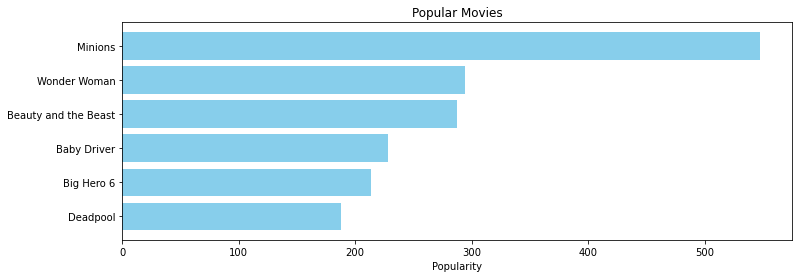

In [89]:
pop= meta.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

### Release Year vs Popularity

In [90]:
def plotjoint(df,x,y,xlim=None,ylim=None,xscale=None,yscale=None):
    sns.set(style=None,font_scale=2)
    grid=sns.jointplot(df[x],df[y],kind="hex",color="#4CB391",height=15,ratio=10,xlim=xlim,ylim=ylim)

In [91]:
meta['year'] = pd.to_datetime(meta['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [92]:
meta.head(2)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,returns,year
0,30000000.0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,7.7,5415.0,12.451801,1995
1,65000000.0,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,4.043035,1995


TypeError: can't multiply sequence by non-int of type 'float'

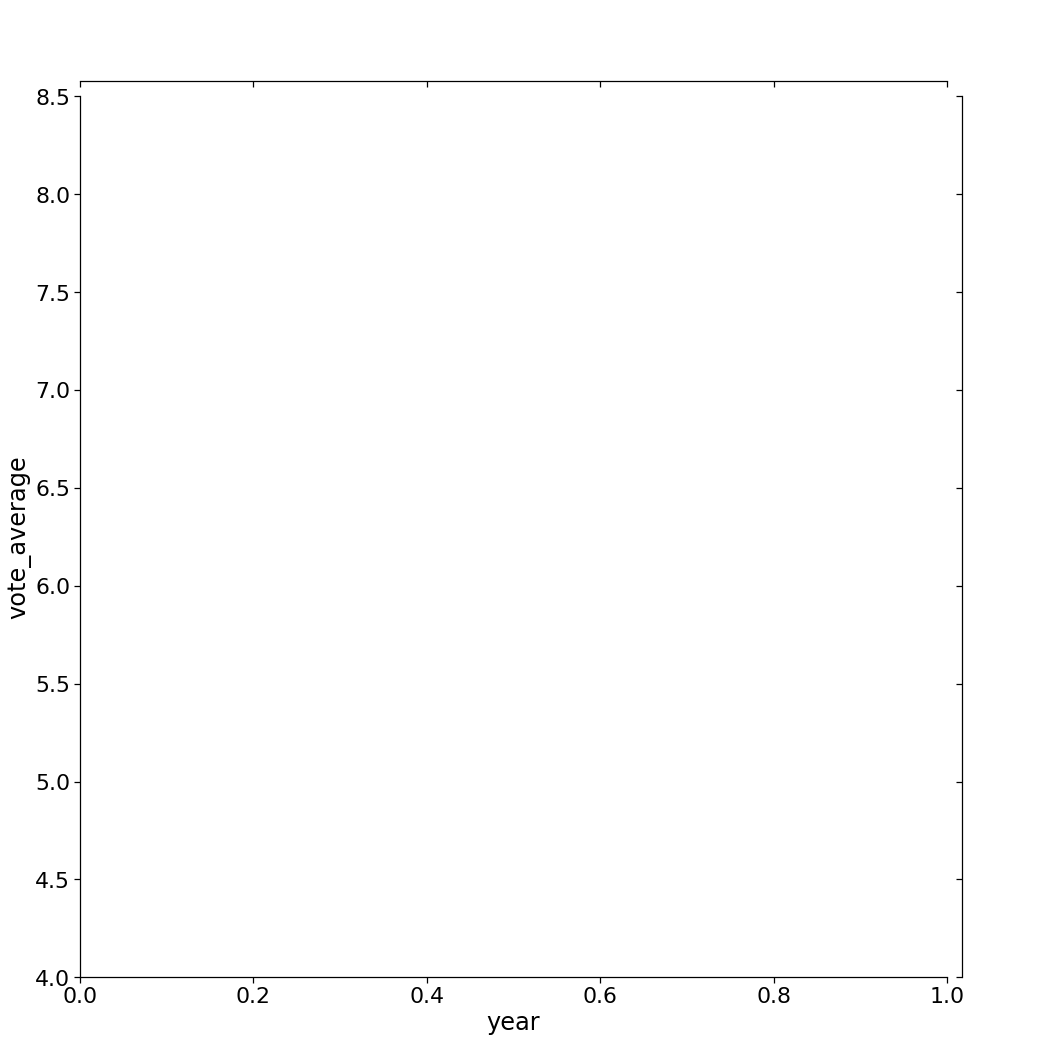

In [93]:
plotjoint(meta,"year","vote_average",ylim=(4,8.5))

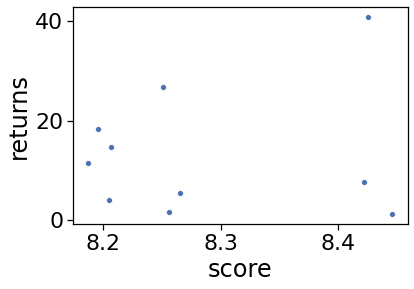

In [98]:
sns.scatterplot(q_movies['score'].head(10), q_movies['returns'].head(10))

In [146]:
q_movies['popularity']=pd.to_numeric(q_movies['popularity'], errors='coerce')

In [147]:
q_movies['popularity'] = q_movies['popularity'].replace(0, np.nan)

In [150]:
temp.dtypes

budget                  float64
genres                   object
id                       object
original_language        object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count              float64
returns                 float64
score                   float64
dtype: object

In [151]:
temp = q_movies.query('popularity > 5  and score < 4.5').head(100)

In [152]:
temp

(15, 19)

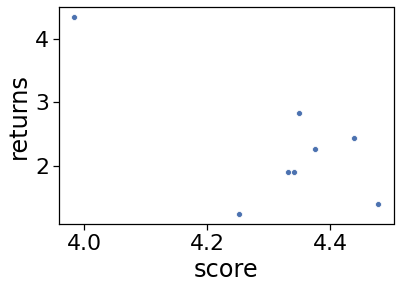

In [140]:
sns.scatterplot(temp['score'], temp['returns'])